## Lab 9. Topic 3. Deep Neural Networks
## Recurrent Neural Networks

In this Lab we learn how to solve sequential problems using RNNs. We will describe how can RNNs be implemented with tensorflow and evaluate their results in real problems. 


We will use material from the book "Hands-On Machine Learning with Scikit-Learn and TensorFlow. Concepts, Tools, and Techniques to Build Intelligent Systems" by Aurélien Géron. http://shop.oreilly.com/product/0636920052289.do that it is recommended as Bibliography of the course.


In [55]:
# We start by importing the python libraries required to solve the problems

import numpy as np
import numpy.random as rnd
import itertools 
import os
import sys
import scipy.misc

# We used some utilities from sklearn
from sklearn.preprocessing import StandardScaler


# Tensorflow library used for implementation of the RNNs
import tensorflow as tf
from keras.datasets import imdb, mnist, fashion_mnist
# Importing keras libraries
from keras.callbacks import EarlyStopping
from keras.layers import SimpleRNN, LSTM, Conv1D, MaxPooling1D
from keras.layers import recurrent
from keras.layers.core import Dense, Flatten, Dropout
from keras.models import Sequential
from keras.layers.embeddings import Embedding 
from keras.preprocessing import sequence
from keras.utils import to_categorical
import random

import csv
from sklearn.externals.six.moves.urllib.request import urlopen

# Used for plotting and display of figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


from IPython.display import display
from IPython.display import Image
from IPython.display import SVG

### Auxiliary functions 

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

We start by simulating the behavior of a simple recurrent cell when the time increases. The following two functions are implementations of the simple RNN.  Observe the code and see how the different weights are combined to produce the output of the cell. 

In [3]:
# The parameters of the function are:
# time_steps: Number of time_steps for the sequence
# input_features: Number of input features for each time step
# output_features:  Number of output features for each time step
# input_seq: Input sequence
# The function returns the state of the cell in each time step


def Simple_RNN(time_steps,input_features, output_features, input_seq):
    
    state_t = np.zeros((output_features,))   # The state is initialized to 0    
    Wsx = np.random.random((output_features,input_features))  # Weights for input
    Wss = np.random.random((output_features,output_features)) # Weights for the state
    bs = np.random.random((output_features,))                 # Initial bias
    
    successive_outputs = [] 
    for i,input_t in enumerate(input_seq):   
        
        state_t = sigmoid(np.dot(Wsx,input_t) + np.dot(Wss,state_t) + bs)
        output_t = state_t                         # We assume the cell is simple and
                                                   # do not use weights for the outpu
        #print(i,state_t)
        successive_outputs.append(state_t) 
        
    final_output_sequence = np.concatenate(successive_outputs,axis=0)    
    return final_output_sequence

In [4]:
# The parameters of the function are:
# time_steps: Number of time_steps for the sequence
# input_features: Number of input features for each time step
# output_features:  Number of output features for each time step
# input_seq: Input sequence

#Wsx: Input weight matrix
#Wss:  State weight matrix
#bs:   Bias

# The function returns the state of the cell in each time step


def Simple_RNN_With_Weights(time_steps,input_features, output_features, 
                            input_seq,Wsx,Wss,bs):
    
    state_t = np.zeros((output_features,))   # The state is initialized to 0
   
    successive_outputs = [] 
    for i,input_t in enumerate(input_seq):   
        #print(i,Wsx,Wss,input_t,state_t)
        #state_t = np.dot(Wsx,input_t) + np.dot(Wss,state_t) + bs
        state_t = np.tanh(np.dot(Wsx,input_t) + np.dot(Wss,state_t) + bs)
        
       
        output_t = state_t                         # We assume the cell is simple and
                                                   # do not use weights for the outpu
        #print(i,state_t)
        successive_outputs.append(state_t) 
        
    final_output_sequence = np.concatenate(successive_outputs,axis=0)
    
    return final_output_sequence

In the following trivial example, we use a simple cell in which the neuron receives only one input and predicts only one output at each time t.

We fix the weights to:

- Wsx: 1, 
- Wss=0.5
- bs = 0
- Phi = tanh


and compute the state of the neuron each time. 

In [5]:
#inputs = np.random.random((time_steps,input_features))
input_features = 1
output_features = 1

time_steps = 100
inputs = np.zeros((time_steps,input_features))
inputs[0] = 1

final_output_sequence = Simple_RNN_With_Weights(time_steps,input_features, output_features,
                                   inputs,1,0.5,0)

print("The output of the cell at time  is ", final_output_sequence[time_steps-1])

    

The output of the cell at time  is  1.1301801928825059e-30


Finally we plot the output of the cell at each time. Notice how fast it converges to zero. 

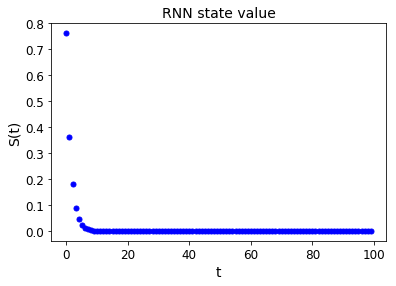

In [6]:
plt.title("RNN state value", fontsize=14)
plt.plot(final_output_sequence, "bo", markersize=5)
plt.xlabel("t")
plt.ylabel("S(t)")

#save_fig("time_series_pred_plot")
plt.show()
    

In the following cell you can also test how the random initialization of the matrices affects two different sequences. 

In [7]:
#inputs = np.random.random((time_steps,input_features))
input_features = 1
output_features = 1
time_steps = 5

# This input sequence is equal zero in all the positions except the first
inputs_1 = np.zeros((time_steps,input_features))
inputs_1[0] = 1

# This input sequence is equal one in all the positions 
inputs_2 = np.ones((time_steps,input_features)) *  1

for j,inputs  in enumerate([inputs_1,inputs_2]):
    for i in np.arange(5):
        final_output_sequence = Simple_RNN(time_steps,input_features, output_features,
                                   inputs_1)
        print("Sequence ",j, "Trial ", i, "sequence ", 
              np.around(final_output_sequence,decimals=3))
     

Sequence  0 Trial  0 sequence  [0.817 0.811 0.81  0.81  0.81 ]
Sequence  0 Trial  1 sequence  [0.849 0.761 0.757 0.757 0.757]
Sequence  0 Trial  2 sequence  [0.778 0.766 0.765 0.765 0.765]
Sequence  0 Trial  3 sequence  [0.672 0.715 0.721 0.722 0.722]
Sequence  0 Trial  4 sequence  [0.785 0.776 0.775 0.775 0.775]
Sequence  1 Trial  0 sequence  [0.783 0.796 0.798 0.798 0.798]
Sequence  1 Trial  1 sequence  [0.738 0.665 0.653 0.651 0.651]
Sequence  1 Trial  2 sequence  [0.583 0.613 0.617 0.618 0.618]
Sequence  1 Trial  3 sequence  [0.812 0.705 0.699 0.699 0.699]
Sequence  1 Trial  4 sequence  [0.75  0.621 0.609 0.608 0.608]


## Time series prediction with an RNN

The first problem we consider is time series prediction with an RNN. Given a sequence of k contiguous points of the time series, $(t_{r},t_{r+1},\dots,t_{r+k})$ that are used as inputs, we will try to predict the sequence $(t_{r+1},t_{r+2},\dots,t_{r+k+1})$. Therefore, for each single point at time $t$, the target variable is the time series value at time $t+1$.

The following functions serve to display RGB images


In [8]:
# Displays a single image
def plot_image(image, shape=[28, 28]):
    plt.imshow(image.reshape(shape), cmap="Greys", interpolation="nearest")
    plt.axis("off")
    
def plot_color_image(image):
    plt.imshow(image.astype(np.uint8),interpolation="nearest")
    plt.axis("off")
    
# Displays multiple images   
def plot_multiple_images(images, n_rows, n_cols, pad=2):
    images = images - images.min()  # make the minimum == 0, so the padding looks white
    w,h = images.shape[1:]
    image = np.zeros(((w+pad)*n_rows+pad, (h+pad)*n_cols+pad))
    for y in range(n_rows):
        for x in range(n_cols):
            image[(y*(h+pad)+pad):(y*(h+pad)+pad+h),(x*(w+pad)+pad):(x*(w+pad)+pad+w)] = images[y*n_cols+x]
    plt.imshow(image, cmap="Greys", interpolation="nearest")
    plt.axis("off")
    

The following functions serve to display RGB images


In [9]:
# This function set the seeds of the tensorflow function
# to make this notebook's output stable across runs

def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

IMPORTANT:  The following line forces tensorflow to use the CPU instead of the GPU. I did this because had problems with my GPU. You can set 'GPU': 1

In [10]:
config = tf.ConfigProto(device_count = {'GPU': 0})


The function belows generates a particular time series. 

In [11]:
def time_series(t):
    return t * np.sin(t) / 3 + 2 * np.sin(t*5)


To train the network we need sequences of size $k$ extracted from the time series. They are randomly selected using the function "next_batch" that outputs a set of <batch_size> training points, each point corresponding to a sequence of size k (in the function this size k is called "n_steps"). 



In [12]:
t_min, t_max = 0, 30
resolution = 0.1

# Receives the number of samples (batch_size) of size (n_steps) to extract
# from the time series, and outputs such a sample
def next_batch(batch_size, n_steps):
    t0 = np.random.rand(batch_size, 1) * (t_max - t_min - n_steps * resolution)
    Ts = t0 + np.arange(0., n_steps + 1) * resolution
    ys = time_series(Ts)
    return ys[:, :-1].reshape(-1, n_steps, 1), ys[:, 1:].reshape(-1, n_steps, 1)

In the next cell, we visualize the time series, and an example of training pairs $(x,y)$, where $x$ is a sequence of $k=20$ points and $y$ is the target sequence of $20$ points, the ones obtained by shifting $x$ only one position. 

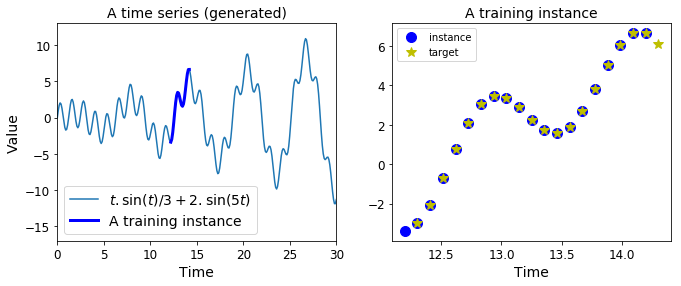

In [13]:
# The time series and the example of (x,y) are shown 

t = np.linspace(t_min, t_max, int((t_max - t_min) / resolution))

n_steps = 20
t_instance = np.linspace(12.2, 12.2 + resolution * (n_steps + 1), n_steps + 1)

plt.figure(figsize=(11,4))
plt.subplot(121)
plt.title("A time series (generated)", fontsize=14)
plt.plot(t, time_series(t), label=r"$t . \sin(t) / 3 + 2 . \sin(5t)$")
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "b-", linewidth=3, label="A training instance")
plt.legend(loc="lower left", fontsize=14)
plt.axis([0, 30, -17, 13])
plt.xlabel("Time")
plt.ylabel("Value")

plt.subplot(122)
plt.title("A training instance", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "y*", markersize=10, label="target")
plt.legend(loc="upper left")
plt.xlabel("Time")


#save_fig("time_series_plot")
plt.show()


Now, the parameters of the RNN are defined.

In [14]:
# The computation graph is initialized
reset_graph()

# n_steps is the size of the contiguous sequence that is taken from the TS
# it coincides with the number of time steps for the RNN
n_steps = 20

# An RNN can take as inputs multiple input sequences (e.g, a matrix of n_seq x n_steps)
# Since we use only a single TS, n_inputs=1
n_inputs = 1

# There is one layer of 100 recurrent neurons together
n_neurons = 100

# The ouput will be a single sequence
n_outputs = 1

# Notice the way the input and output are defined according to n_steps
X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

In the following notebook cell we specify the type of RNN layer telling tensorflow which RNN cells it comprises. Remember that there are other, more efficient, memory cells, such as LSTM, GRU, etc.  

In this example, a Basic RNN cell is defined, the layer has n_neurons and uses as activation function RELU. 

Finally, the OutputProjectionWrappers adds another layer that transforms the output of the n_neuron neurons into a single value, this function "wraps" the output of the recurrent neurons. 

In [15]:
cell = tf.contrib.rnn.OutputProjectionWrapper(
    tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu),
    #tf.contrib.rnn.BasicLSTMCell(num_units=n_neurons),
    output_size=n_outputs)

outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)


Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.


As in any other NN, we need to specify the loss function, and optimization algorithm. 

In [16]:
# Learning rate used by the gradient optimizer
learning_rate = 0.001

# The loss function is the Minimum Square Error between the predicted
# TS and the target TS
loss = tf.reduce_mean(tf.square(outputs - y)) # MSE

# Optimizer is ADAM
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

# We will minimize the MSE
training_op = optimizer.minimize(loss)

# Tensorflow variables are initialized
init = tf.global_variables_initializer()
saver = tf.train.Saver()

The network is trained running "n_iterations" and training batch_size groups of training data. We will save the session at the end so we could use the network to predict new data. 

In [17]:
n_iterations = 2500
batch_size = 50

with  tf.Session(config=config) as sess:
    init.run()
    for iteration in range(n_iterations):
        X_batch, y_batch = next_batch(batch_size, n_steps)
        sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if iteration % 100 == 0:
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(iteration, "\tMSE:", mse)
    
    saver.save(sess, "./my_time_series_model") # not shown in the book


0 	MSE: 11.967254
100 	MSE: 0.525841
200 	MSE: 0.1495599
300 	MSE: 0.07279411
400 	MSE: 0.06158535
500 	MSE: 0.05938873
600 	MSE: 0.05470166
700 	MSE: 0.047849063
800 	MSE: 0.05107608
900 	MSE: 0.047209196
1000 	MSE: 0.047058314
1100 	MSE: 0.047831465
1200 	MSE: 0.04083041
1300 	MSE: 0.047086805
1400 	MSE: 0.041784383
1500 	MSE: 0.048623666
1600 	MSE: 0.050365966
1700 	MSE: 0.042426053
1800 	MSE: 0.032977458
1900 	MSE: 0.04590435
2000 	MSE: 0.040674362
2100 	MSE: 0.03352144
2200 	MSE: 0.03732467
2300 	MSE: 0.04645707
2400 	MSE: 0.038150005


If training has worked well, then the MSE should have decreased with the iteractions. In the next cell the RNN is used to predict data from 

In [18]:
with  tf.Session(config=config) as sess:
    # The session that we saved is restored
    saver.restore(sess, "./my_time_series_model")  
    # A segment of points is taken from the TS
    X_new = time_series(np.array(t_instance[:-1].reshape(-1, n_steps, n_inputs)))
    # Predictions are made
    y_pred = sess.run(outputs, feed_dict={X: X_new})


INFO:tensorflow:Restoring parameters from ./my_time_series_model


Finally, the true TS values and the predictions are shown

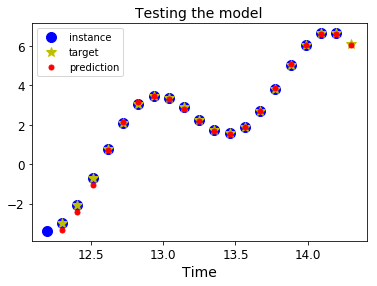

In [19]:
plt.title("Testing the model", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "y*", markersize=10, label="target")
plt.plot(t_instance[1:], y_pred[0,:,0], "r.", markersize=10, label="prediction")
plt.legend(loc="upper left")
plt.xlabel("Time")

#save_fig("time_series_pred_plot")
plt.show()

## Exercise 1

The first exercise is similar to the previous example, it consists of predicting  the value of a time series (ISE.1 time series in this case) using the same time series until moment $t$. The difference is that we will ALSO use another $7$ time series as input.

We will use the "ISTANBUL STOCK EXCHANGE Data Set" from the UCI website (https://archive.ics.uci.edu/ml/datasets/ISTANBUL+STOCK+EXCHANGE#). It has been used to forecast the ISE100 index and to determine its daily directional movements. For more information about the meaning of the rate of return of a stock exchange you can see (https://en.wikipedia.org/wiki/Rate_of_return) but this is not relevant for the completion of the exercise. 

To solve the exercise you should: 

Modify the following cells to create an RNN that solves the problem taking into account the following characteristics:

1. Sequence size for prediction: 30
2. Number of neurons: 40
3. You should compare the results of LSTM, GRU, and basic RNN cells (just write down the final MSE values you get with the three types of cells to determine which one is the best).
4. Modify the network to predict the values of the time series taking into consideration the values of the OTHER 7 timeseries BUT NOT the values of the target time series.  




We read the dataset that is included within folder "regression"

In [20]:
import pandas as pd
import seaborn as sns

#stock_Istambul = pd.read_excel('regression/data_akbilgic.xlsx')
#df = pd.DataFrame(stock_Istambul)
#df.to_csv('regression/data_akbilgic.csv')

df = pd.read_csv('data_akbilgic.csv')
df

,date,ISE,ISE.1,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,5-Jan-09,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
1,6-Jan-09,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2,7-Jan-09,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
3,8-Jan-09,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
4,9-Jan-09,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802
5,12-Jan-09,-0.029191,-0.042361,-0.022823,-0.013526,-0.005026,-0.049039,-0.053849,-0.012451,-0.022630
6,13-Jan-09,0.015445,-0.000272,0.001757,-0.017674,-0.006141,0.000000,0.003572,-0.012220,-0.004827
7,14-Jan-09,-0.041168,-0.035552,-0.034032,-0.047383,-0.050945,0.002912,-0.040302,-0.045220,-0.008677
8,15-Jan-09,0.000662,-0.017268,0.001328,-0.019551,-0.014335,-0.050448,0.030314,-0.012070,-0.023429
9,16-Jan-09,0.022037,0.032278,0.007533,0.006791,0.006289,0.025453,0.004867,0.008561,0.010917


The TS that will be predicted is plotted. Notice that it is less "clean" than the toy problem shown in the example before.

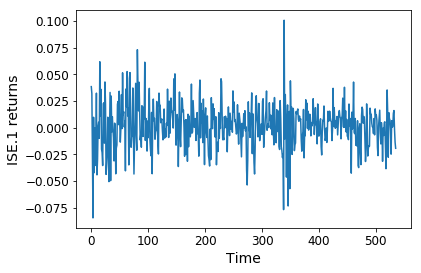

In [21]:
plt.plot(df['ISE.1'])
plt.xlabel("Time")
plt.ylabel("ISE.1 returns")
plt.show()

For a correct estimation of the prediction quality we split the data between train and test in the following cell.

In [22]:
df_size = df.shape[0]
df_train = df.iloc[:int(df_size/2),:]
df_test = df.iloc[int(df_size/2):,:]

The following cell is used to generate batches with which the RNN is trained. 

NOTICE: You will need to modify this function to answer the last part (point 4) of the exercise. But you do not need to change it to answer to complete the other parts. 

In [23]:
# Receives the number of samples (batch_size) of size (n_steps) to extract
# from the time series, and outputs such a sample
def next_stock_batch(batch_size, n_steps, df_base):
    t_min = 0
    t_max = df_base.shape[0]
  
    # The inputs will be formed by 8 sequences taken from
    # 8 time series [ISE.1,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM]
    x = np.zeros((batch_size,n_steps,7))
    
    # We want to predict the returns of the Istambul stock
    # taken into consideration the previous n_steps days
    y = np.zeros((batch_size,n_steps,1))

    # We chose batch_size random points from time series x-axis

    starting_points = np.random.randint(0,t_max-n_steps-1,size=batch_size)    
    #print(starting_points)

    # We create the batches for x using all time series (8) between t and t+n_steps    
    # We create the batches for y using only one time series between t+1 and t+n_steps+1
    
    for k in np.arange(batch_size):
        lmat = []
        for j in np.arange(n_steps+1):
            lmat.append(df_base.iloc[starting_points[k]+j,2:].as_matrix())  
            mat = np.array(lmat)
        # The x values include all columns (mat[:n_steps,:]), these are ([ISE.1,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM])
        # and TS values in mat between 0 and n_steps
        x[k,:,:] = mat[:n_steps,1:]
        
        # The y values include only column 0 (mat[1:n_steps+1,0]), this is ([ISE.1]) 
        # and TS values in mat between 1 and n_steps+1
        y[k,:,0] = mat[1:n_steps+1,0]
   

    return x,y



Below is the cell that comprises the definition of the RNN and its input parameters. You should modify this part to answer the questions of the exercise.

In [31]:
# The computation graph is initialized
reset_graph()

# n_steps is the size of the contiguous sequence that is taken from the TS
# it coincides with the number of time steps for the RNN
n_steps = 50

# An RNN can take as inputs multiple input sequences (e.g, a matrix of n_seq x n_steps)
n_inputs = 7

# There is one layer of 60 recurrent neurons together
n_neurons = 60

# The ouput will be a single sequence
n_outputs = 1

# Notice the way the input and output are defined according to n_steps
X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])


basic = tf.contrib.rnn.OutputProjectionWrapper(
    tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu),
    output_size=n_outputs)


basic_outputs, basic_states = tf.nn.dynamic_rnn(basic, X, dtype=tf.float32)

# Learning rate used by the gradient optimizer (ADAM)
learning_rate = 0.001

# The loss function is the Minimum Square Error between the predicted
# TS and the target TS
loss_basic = tf.reduce_mean(tf.square(basic_outputs - y)) # MSE

# Optimizer is ADAM
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

# We will minimize the MSE
training_basic = optimizer.minimize(loss_basic)


# Tensorflow variables are initialized
init = tf.global_variables_initializer()
saver = tf.train.Saver()


n_iterations = 500
batch_size = 50
printing_gap = 50

with  tf.Session(config=config) as sess:
    init.run()
    for iteration in range(n_iterations):
        X_batch, y_batch = next_stock_batch(batch_size, n_steps, df_train)
        
        sess.run(training_basic, feed_dict={X: X_batch, y: y_batch})

        if iteration % printing_gap == 0:
            mse = loss_basic.eval(feed_dict={X: X_batch, y: y_batch})
            print(iteration, "\tBasic MSE:", mse)

    
    saver.save(sess, "./istambul_model")




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


0 	Basic MSE: 0.00050212565


In [33]:
# Making prediction for the train dataset (df_train)

with  tf.Session(config=config) as sess:
    # The session that we saved is restored
    saver.restore(sess, "./istambul_model")  
    # A segment of points is taken from the TS
    X_new, y_new = next_stock_batch(1, n_steps, df_train)
   
    # Predictions are made
    y_pred = sess.run(basic_outputs, feed_dict={X: X_new})

INFO:tensorflow:Restoring parameters from ./istambul_model


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


We plot the predictions

(1, 50, 1) (1, 50, 1)


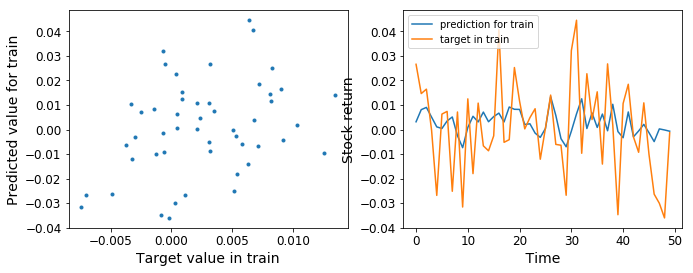

In [34]:
print(y_pred.shape,y_new.shape)


plt.figure(figsize=(11,4))
plt.subplot(121)
plt.plot(y_pred.reshape(n_steps),y_new.reshape(n_steps),'.')
plt.xlabel("Target value in train")
plt.ylabel("Predicted value for train")

plt.subplot(122)
plt.plot(y_pred.reshape(n_steps), label="prediction for train")
plt.plot(y_new.reshape(n_steps), label="target in train")
plt.xlabel(" Time ")
plt.ylabel("Stock return")
plt.legend(loc="upper left")



We compute the predictions for the test data

## Solving the MNIST classification problem using an RNN

The next two examples show how to solve the MNIST problem using an RNN and a "deep" RNN of only 3 layers. For the classification problem the idea here is to treat each image as a sequence of 28 rows of 28 pixels each. Therefore the number of steps for the RNN is 28. In each step it uses the current row of the image and the output of the RNN in the previous step to make its prediction. However, in terms of the solution quality, we are only interested in the final prediction of the network (what digit the image represents).

Reading the MNIST dataset

In [35]:
def Read_And_Normalize_Image_Dataset(db_name='mnist', max_train_samples = 10000,max_test_samples = 10000):

    if db_name=='mnist':
        (x_train, y_train), (x_test, y_test) = mnist.load_data()               
    elif db_name=='fashion':
        (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()        
        
    #print(x_train.shape,y_train.shape)
    #print(x_test.shape,y_test.shape)

        
    x_train = x_train.astype('float32') / 255.
    x_test = x_test.astype('float32') / 255.
    
    #x_train = np.expand_dims(x_train, axis=3)
    #x_test = np.expand_dims(x_test, axis=3)
    #x_train = x_train.reshape((len(x_train), 28*28))
    #x_test = x_test.reshape((len(x_test), 28*28))

    return (x_train, y_train), (x_test, y_test) 


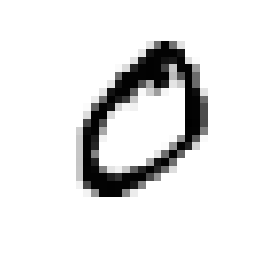

In [36]:
(X_train, y_train), (X_test, y_test) = Read_And_Normalize_Image_Dataset("mnist")


# This line is to test you have downloaded the right dataset
plot_image(X_train[1,:])

### Single-layer RNN

The parameters and the architecture of the one-layer are defined. Pay attention to the size of the inputs and the type of loss function used. 

In [37]:
reset_graph()

n_steps = 28
n_inputs = 28
n_neurons = 150
n_outputs = 10


learning_rate = 0.001


X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.int32, [None])

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)

# The last layer will be a dense layer
logits = tf.layers.dense(states, n_outputs)

# softmax cross-entropy is the loss function to optimize
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                          logits=logits)
loss = tf.reduce_mean(xentropy)

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

# A classification is correct if the most probable class corresponds
# with the true class
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()

The network is trained. 

In [38]:
n_epochs = 15
batch_size = 150

with  tf.Session(config=config) as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(X_train.shape[0] // batch_size):
            random_batch = np.random.randint(0, X_train.shape[0], size=batch_size)
            X_batch, y_batch = X_train[random_batch, :], y_train[random_batch]
            X_batch = X_batch.reshape((-1, n_steps, n_inputs))
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})

        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)



0 Train accuracy: 0.9533333 Test accuracy: 0.9373
1 Train accuracy: 0.96 Test accuracy: 0.9408
2 Train accuracy: 0.9533333 Test accuracy: 0.9562
3 Train accuracy: 0.96 Test accuracy: 0.9651
4 Train accuracy: 0.98 Test accuracy: 0.9672
5 Train accuracy: 0.96666664 Test accuracy: 0.9607
6 Train accuracy: 0.99333334 Test accuracy: 0.9725
7 Train accuracy: 0.9866667 Test accuracy: 0.9641
8 Train accuracy: 0.96666664 Test accuracy: 0.9686
9 Train accuracy: 0.9866667 Test accuracy: 0.9708
10 Train accuracy: 0.9866667 Test accuracy: 0.9732
11 Train accuracy: 0.98 Test accuracy: 0.9679
12 Train accuracy: 0.96 Test accuracy: 0.9705
13 Train accuracy: 0.96666664 Test accuracy: 0.9763
14 Train accuracy: 1.0 Test accuracy: 0.9745


### Three-layer RNN 

See how the architecture of the RNN is created.

In [39]:
reset_graph()


n_steps = 28
n_inputs = 28
n_neurons_1 = 50
n_neurons = 30

n_outputs = 10


learning_rate = 0.001


X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.int32, [None])

# We define RNN cells of two different classes
rnn_cell1 = tf.contrib.rnn.BasicLSTMCell(num_units=n_neurons_1)

# The cells are stacked within the RNN
stack_rnn = [rnn_cell1]
for i in range(1, 3):
    stack_rnn.append(tf.contrib.rnn.BasicLSTMCell(num_units=n_neurons))
multi_layer_cell = tf.contrib.rnn.MultiRNNCell(stack_rnn, state_is_tuple = True)

outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

# We need to transpose the outputs of the network because we are only interested
# in the output of the last row. After transpose  the time axis is first
outputs = tf.transpose(outputs, [1, 0, 2])

# tf.gather() is used for selecting the last frame.
last = tf.gather(outputs, int(outputs.get_shape()[0]) - 1)

# The last layer will be a dense layer connecting all the last outputs
# with a layer of the ten possible outputs we are interested in
logits = tf.layers.dense(last, n_outputs)

# softmax cross-entropy is the loss function to optimize
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                          logits=logits)
loss = tf.reduce_mean(xentropy)

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

# A classification is correct if the most probable class corresponds
# with the true class
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()

Instructions for updating:
This class is deprecated, please use tf.nn.rnn_cell.LSTMCell, which supports all the feature this cell currently has. Please replace the existing code with tf.nn.rnn_cell.LSTMCell(name='basic_lstm_cell').


/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [40]:
n_epochs = 15
batch_size = 150

with  tf.Session(config=config) as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(X_train.shape[0] // batch_size):
            random_batch = np.random.randint(0, X_train.shape[0], size=batch_size)
            X_batch, y_batch = X_train[random_batch, :], y_train[random_batch]
            X_batch = X_batch.reshape((-1, n_steps, n_inputs))
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})

        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)



0 Train accuracy: 0.93333334 Test accuracy: 0.9233
1 Train accuracy: 0.96666664 Test accuracy: 0.9478
2 Train accuracy: 0.96666664 Test accuracy: 0.9606
3 Train accuracy: 0.96 Test accuracy: 0.9694


KeyboardInterrupt: 

## Exercise 2

1. Create a multi-layer RNN of 5 layers (25,40,40,40,25) with GRU cells that learns to classify the fashion dataset.
2. Modify the network to consider a classification as correct if it is within the 3 most probable outputs of the network.
3. Create a new RNN network that classifies the join dataset of MNIST and fashion data.



In [ ]:
(X_train_fashion, y_train_fashion), (X_test_fashion, y_test_fashion) = Read_And_Normalize_Image_Dataset("fashion")


# This line is to test you have downloaded the right dataset
plot_image(X_train_fashion[1,:])

## Stock prediction with RNNs in Keras

In this example we build RNN architectures to predict the stock market in a period between 2003 and 2008. First, information about 56 stocks is downloaded. 

The stock data is downloaded

In [41]:
# #############################################################################
# Retrieve the data from Internet

# The data is from 2003 - 2008. This is reasonably calm: (not too long ago so
# that we get high-tech firms, and before the 2008 crash). This kind of
# historical data can be obtained for from APIs like the quandl.com and
# alphavantage.co ones.
#start_date = datetime(2003, 1, 1).date()
#end_date = datetime(2008, 1, 1).date()

symbol_dict = {
    'TOT': 'Total',
    'XOM': 'Exxon',
    'CVX': 'Chevron',
    'COP': 'ConocoPhillips',
    'VLO': 'Valero Energy',
    'MSFT': 'Microsoft',
    'IBM': 'IBM',
    'TWX': 'Time Warner',
    'CMCSA': 'Comcast',
    'CVC': 'Cablevision',
    'YHOO': 'Yahoo',
    'DELL': 'Dell',
    'HPQ': 'HP',
    'AMZN': 'Amazon',
    'TM': 'Toyota',
    'CAJ': 'Canon',
    'SNE': 'Sony',
    'F': 'Ford',
    'HMC': 'Honda',
    'NAV': 'Navistar',
    'NOC': 'Northrop Grumman',
    'BA': 'Boeing',
    'KO': 'Coca Cola',
    'MMM': '3M',
    'MCD': 'McDonald\'s',
    'PEP': 'Pepsi',
    'K': 'Kellogg',
    'UN': 'Unilever',
    'MAR': 'Marriott',
    'PG': 'Procter Gamble',
    'CL': 'Colgate-Palmolive',
    'GE': 'General Electrics',
    'WFC': 'Wells Fargo',
    'JPM': 'JPMorgan Chase',
    'AIG': 'AIG',
    'AXP': 'American express',
    'BAC': 'Bank of America',
    'GS': 'Goldman Sachs',
    'AAPL': 'Apple',
    'SAP': 'SAP',
    'CSCO': 'Cisco',
    'TXN': 'Texas Instruments',
    'XRX': 'Xerox',
    'WMT': 'Wal-Mart',
    'HD': 'Home Depot',
    'GSK': 'GlaxoSmithKline',
    'PFE': 'Pfizer',
    'SNY': 'Sanofi-Aventis',
    'NVS': 'Novartis',
    'KMB': 'Kimberly-Clark',
    'R': 'Ryder',
    'GD': 'General Dynamics',
    'RTN': 'Raytheon',
    'CVS': 'CVS',
    'CAT': 'Caterpillar',
    'DD': 'DuPont de Nemours'}


symbols, names = np.array(sorted(symbol_dict.items())).T

quotes = []

for symbol in symbols:
    print('Fetching quote history for %r' % symbol, file=sys.stderr)
    url = ('https://raw.githubusercontent.com/scikit-learn/examples-data/'
           'master/financial-data/{}.csv')
    data = list(csv.DictReader(l.decode('utf8')
                               for l in urlopen(url.format(symbol))))
    quotes.append({'close': [float(rec['close']) for rec in data],
                   'open': [float(rec['open']) for rec in data]})

close_prices = np.vstack([q['close'] for q in quotes])
open_prices = np.vstack([q['open'] for q in quotes])

# The daily variations of the quotes are what carry most information
variation = close_prices - open_prices


Fetching quote history for 'AAPL'
Fetching quote history for 'AIG'
Fetching quote history for 'AMZN'
Fetching quote history for 'AXP'
Fetching quote history for 'BA'
Fetching quote history for 'BAC'
Fetching quote history for 'CAJ'
Fetching quote history for 'CAT'
Fetching quote history for 'CL'
Fetching quote history for 'CMCSA'
Fetching quote history for 'COP'
Fetching quote history for 'CSCO'
Fetching quote history for 'CVC'
Fetching quote history for 'CVS'
Fetching quote history for 'CVX'
Fetching quote history for 'DD'
Fetching quote history for 'DELL'
Fetching quote history for 'F'
Fetching quote history for 'GD'
Fetching quote history for 'GE'
Fetching quote history for 'GS'
Fetching quote history for 'GSK'
Fetching quote history for 'HD'
Fetching quote history for 'HMC'
Fetching quote history for 'HPQ'
Fetching quote history for 'IBM'
Fetching quote history for 'JPM'
Fetching quote history for 'K'
Fetching quote history for 'KMB'
Fetching quote history for 'KO'
Fetching quote h

We visualize data for two of the time series, AAPL and AIG indices

Text(0,0.5,'Variation')

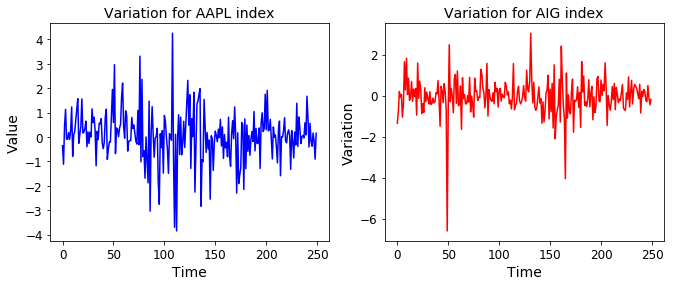

In [42]:
period = np.arange(400,650)
plt.figure(figsize=(11,4))
plt.subplot(121)
plt.title("Variation for AAPL index", fontsize=14)
plt.plot(variation[0,period],'b')
#plt.plot(variation[1,:],'r.')
plt.xlabel("Time")
plt.ylabel("Value")

plt.subplot(122)
plt.title("Variation for AIG index", fontsize=14)
plt.plot(variation[1,period],'r-')
plt.xlabel("Time")
plt.ylabel("Variation")


In [43]:
variation.shape


(56, 1258)

Auxiliary function to create batches for a single time-series

In [44]:

def Create_Data(data,look_back,number_samples):
    n_seq = data.shape[-1]    
    X = np.zeros((number_samples,look_back))
    # We select random positions to get the sequences for learning
    pos =  look_back + np.random.randint(n_seq-look_back,size=number_samples)
    
    # The target variable is the stock time series at that position
    Y = data[pos]
    for i in np.arange(number_samples):
        X[i,:] = data[(pos[i]-look_back):pos[i]]
        
        
    return X,Y
    

In the first approach we will predict one time series using a sequence of lookup observations from the same time series, i.e., input_features=look_back and output_features=1

The train and test datasets are created. Observe the way in which they are created. 

In [45]:
number_observations = variation.shape[-1]
indices_for_train = np.arange(0,int(number_observations/2))
indices_for_test = np.arange(int(number_observations/2),number_observations)

look_back = 5
nsamples = 1000

trainX, trainY = Create_Data(variation[0,indices_for_train],look_back,nsamples)
testX, testY = Create_Data(variation[0,indices_for_test],look_back,nsamples)


trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX,   (testX.shape[0], testX.shape[1],    1))
trainY = np.reshape(trainY, (trainY.shape[0],1))
testY = np.reshape(testY, (testY.shape[0], 1))

trainX.shape


(1000, 5, 1)

An Simple RNN model is created. 

In [46]:
number_cells = 25

stock_model = Sequential ()
stock_model.add(SimpleRNN(number_cells, input_shape =(look_back, 1) ))
stock_model.add(Dropout(0.2))
stock_model.add (Dense (activation = 'linear',units=1))
stock_model.compile (loss ="mean_squared_error" , metrics=['mse'], optimizer = "adam")  
print(stock_model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 25)                675       
_________________________________________________________________
dropout_1 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 701
Trainable params: 701
Non-trainable params: 0
_________________________________________________________________
None


The model is trained and run

In [47]:
nepochs = 50
batch_size = 16
history = stock_model.fit(trainX, trainY, validation_data=(testX,testY), batch_size =batch_size, 
                epochs =nepochs, shuffle = False)


stock_model_train_error = stock_model.evaluate(trainX, trainY, batch_size=batch_size)
stock_model_test_error = stock_model.evaluate(testX, testY, batch_size=batch_size)
print(stock_model_train_error,stock_model_test_error)


Train on 1000 samples, validate on 1000 samples
Epoch 1/50
1000/1000 [==============================] - 1s 968us/step - loss: 0.5871 - mean_squared_error: 0.5871 - val_loss: 3.5747 - val_mean_squared_error: 3.5747
Epoch 2/50
1000/1000 [==============================] - 0s 260us/step - loss: 0.5778 - mean_squared_error: 0.5778 - val_loss: 3.5617 - val_mean_squared_error: 3.5617
Epoch 3/50
1000/1000 [==============================] - 0s 246us/step - loss: 0.5819 - mean_squared_error: 0.5819 - val_loss: 3.5657 - val_mean_squared_error: 3.5657
Epoch 4/50
1000/1000 [==============================] - 0s 253us/step - loss: 0.5721 - mean_squared_error: 0.5721 - val_loss: 3.5797 - val_mean_squared_error: 3.5797
Epoch 5/50
1000/1000 [==============================] - 0s 253us/step - loss: 0.5588 - mean_squared_error: 0.5588 - val_loss: 3.5751 - val_mean_squared_error: 3.5751
Epoch 6/50
1000/1000 [==============================] - 0s 313us/step - loss: 0.5322 - mean_squared_error: 0.5322 - val_lo

Epoch 50/50
1000/1000 [==============================] - 0s 96us/step
[0.44788307476043704, 0.44788307476043704] [3.6825645713806154, 3.6825645713806154]


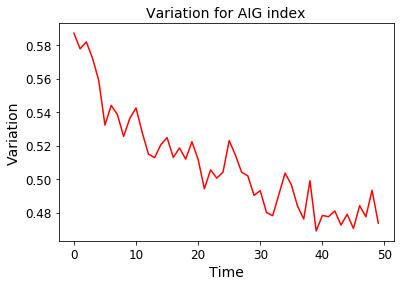

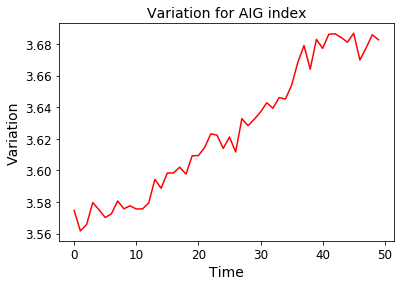

In [48]:
plt.title("Variation for AIG index", fontsize=14)
plt.plot(history.history["mean_squared_error"],'r-')
plt.xlabel("Time")
plt.ylabel("Variation")
plt.show()
plt.title("Variation for AIG index", fontsize=14)
plt.plot(history.history["val_mean_squared_error"],'r-')
plt.xlabel("Time")
plt.ylabel("Variation")
plt.show()

## Exercise 3

In the previous example we predicted the variation for the first stock variation[0,:] using only information about that stock. In the next exercise we would like to use information from all the stocks. 

Function Create_Data_Multiple, creates batches for solving this problem. 

Define a Keras model that contains a single LSTM with 50 cells and one fully connected hidden layer with 50 neurons. Between each layer, include a dropout, with 0.2 probability. Select an adecquate loss function for this problem.

Finally, show the accuracy of the model both in the training set, and in the test set

In [49]:
def Create_Data_Multiple(data,look_back,number_samples,index_to_predict):
    n_seq = data.shape[-1]   
    n_col = data.shape[0] 
    X = np.zeros((number_samples,look_back,n_col))
    # We select random positions to get the sequences for learning
    pos =  look_back + np.random.randint(n_seq-look_back,size=number_samples)
    
    # The target variable is the stock time series at that position
    Y = data[index_to_predict,pos]
    for i in np.arange(number_samples):
        X[i,:,:] = data[:,(pos[i]-look_back):pos[i]].transpose()
        
    return X,Y

In [50]:
nsamples = 10000
look_back = 30
index_to_predict = 0
indices_to_take = np.arange(0,56)  #[0,1,2,3,4,5,6]
reduced_variation = variation[indices_to_take,:]

trainX, trainY = Create_Data_Multiple(reduced_variation[:,indices_for_train],
                                      look_back,nsamples,index_to_predict)

testX, testY = Create_Data_Multiple(reduced_variation[:,indices_for_test],
                                      look_back,nsamples,index_to_predict)
trainY = np.reshape(trainY, (trainY.shape[0],1))
testY = np.reshape(testY, (testY.shape[0], 1))

testX.shape

(10000, 30, 56)

In [ ]:
nepochs = 10
batch_size = 16

## Exercise 4
### Solving the MNIST classification problem using an RNN.

Below is an incomplete model of an application of an LSTM to solve the MNIST problem. Here, we want to solve the same problem that was treated before Exercise 2, but using Keras instead of vanilla tensorflow.

For that, we define a model onsisting of a single LSTM with 50 neurons, and a single dense layer. Therefore, the model will only have one single hidden layer, with 50 neurons.

After training the model, obtain its accuracy in the test set.


In [51]:
(x_mnist_train, y_mnist_train), (x_mnist_test, y_mnist_test) \
                                = Read_And_Normalize_Image_Dataset(db_name='mnist', \
                                max_train_samples = 10000, max_test_samples = 10000)


print("Dimension of the samples in the training set: ", x_mnist_train.shape)
print("Dimension of samples in the test set: ", x_mnist_test.shape)

number_mnist_classes = 10
y_mnist_train_one_hot  = to_categorical(y_mnist_train)
y_mnist_test_one_hot  = to_categorical(y_mnist_test)

print("Dimension of the labels training set (one_hot): ", y_mnist_train_one_hot.shape)
print("Dimension of the labels test set (one_hot): ", y_mnist_test_one_hot.shape)

Dimension of the samples in the training set:  (60000, 28, 28)
Dimension of samples in the test set:  (10000, 28, 28)
Dimension of the labels training set (one_hot):  (60000, 10)
Dimension of the labels test set (one_hot):  (10000, 10)


In [52]:
number_neurons = 50
time_steps = 1
n_inputs = 28
number_classes = 10
number_epochs = 10
batch_size = 32


In [53]:



print("The accuracy on test data was: %.2f%%" % (mnist_scores[1]*100))

NameError: name 'mnist_scores' is not defined

### Tensorflow implementation of a RNN

In the following cell, we set common parameters of a RNN implementation. 

In [56]:
seed = 1

tf.set_random_seed(seed)
np.random.seed(seed)
random.seed(seed)

num_epochs = 500
total_series_length = 10000
truncated_backprop_length = 20
state_size = 4
batch_size = 20
num_batches = total_series_length//batch_size//truncated_backprop_length

We are also going to redefine the time series we are working with, so that the values are independent of the place we take the batch from

In [57]:
def time_series(t):
    return  np.sin(t) / 3 + 2 * np.sin(t*5)

t_min, t_max = 0, 30
resolution = 0.1

# Receives the number of samples (batch_size) of size (n_steps) to extract
# from the time series, and outputs such a sample
def next_batch(btch_sz, n_steps):
    t0 = np.random.rand(btch_sz, 1) * (t_max - t_min - n_steps * resolution)
    ts = t0 + np.arange(0., n_steps + 1) * resolution
    ys = time_series(ts)
    return ys[:, :-1].reshape(-1, n_steps), ys[:, 1:].reshape(-1, n_steps)

In [63]:
X = tf.placeholder(tf.float32, [None, truncated_backprop_length])
Y = tf.placeholder(tf.int32, [None, truncated_backprop_length])

init_state = tf.placeholder(tf.float32, [None, state_size])

W = tf.Variable(np.random.rand(state_size+1, state_size), dtype=tf.float32)
b = tf.Variable(np.zeros((1,state_size)), dtype=tf.float32)

W2 = tf.Variable(np.random.rand(state_size, 1),dtype=tf.float32)
b2 = tf.Variable(np.zeros((1,1)), dtype=tf.float32)

# Unpack columns
inputs_series = tf.unstack(X, axis=1)
g_truth_series = tf.unstack(Y, axis=1)

print(len(inputs_series), X)
saver = tf.train.Saver()

20 Tensor("Placeholder_5:0", shape=(?, 20), dtype=float32)


Definition of the recurrent part of the network:

In [64]:
current_state = init_state
states_series = []

for current_input in inputs_series:
    current_input = tf.reshape(current_input, [-1, 1])
    input_and_state_concatenated = tf.concat([current_input, current_state], 1)  # Increasing number of columns

    next_state = tf.tanh(tf.matmul(input_and_state_concatenated, W) + b)  # Broadcasted addition
    states_series.append(next_state)
    current_state = next_state

predictions_series = [tf.matmul(state, W2) + b2 for state in states_series] #Broadcasted addition

In [65]:
losses = [tf.losses.mean_squared_error(pred, tf.reshape(val, (-1,1))) for pred, val in zip(predictions_series, g_truth_series)]

total_loss = tf.reduce_mean(losses)

train_step = tf.train.AdagradOptimizer(0.001).minimize(total_loss)

In [66]:
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())

    for epoch_idx in range(num_epochs):
        x,y = next_batch(batch_size, total_series_length)

        _current_state = np.zeros((batch_size, state_size))


        for batch_idx in range(num_batches):
            start_idx = batch_idx * truncated_backprop_length
            end_idx = start_idx + truncated_backprop_length

            batchX = x[:,start_idx:end_idx]
            batchY = y[:,start_idx:end_idx]

            #print(batchY.shape)

            _total_loss, _train_step, _current_state = sess.run([total_loss, train_step, current_state],feed_dict={X:batchX, Y:batchY, init_state:_current_state})


        print("Epoch",epoch_idx, "Loss", _total_loss)


    saver.save(sess, "./myRNN")


Epoch 0 Loss 2.3694263
Epoch 1 Loss 2.3253148
Epoch 2 Loss 2.2288299
Epoch 3 Loss 2.2260008
Epoch 4 Loss 2.2458444
Epoch 5 Loss 2.1638577
Epoch 6 Loss 2.1259868
Epoch 7 Loss 2.1694922
Epoch 8 Loss 2.0442545
Epoch 9 Loss 2.0501285
Epoch 10 Loss 1.9973438
Epoch 11 Loss 2.0166454
Epoch 12 Loss 1.9646384
Epoch 13 Loss 1.9952183
Epoch 14 Loss 1.9235433
Epoch 15 Loss 1.9646496
Epoch 16 Loss 1.9413369
Epoch 17 Loss 1.8826668
Epoch 18 Loss 1.8595221
Epoch 19 Loss 1.8682861
Epoch 20 Loss 1.7737167
Epoch 21 Loss 1.879549
Epoch 22 Loss 1.7548325
Epoch 23 Loss 1.7861
Epoch 24 Loss 1.7723515
Epoch 25 Loss 1.8126364
Epoch 26 Loss 1.8030361
Epoch 27 Loss 1.7097557
Epoch 28 Loss 1.7299236
Epoch 29 Loss 1.737064
Epoch 30 Loss 1.7157109
Epoch 31 Loss 1.7204012
Epoch 32 Loss 1.7109613
Epoch 33 Loss 1.6877254
Epoch 34 Loss 1.7254384
Epoch 35 Loss 1.7123026
Epoch 36 Loss 1.6958745
Epoch 37 Loss 1.6183503
Epoch 38 Loss 1.6491325
Epoch 39 Loss 1.6537908
Epoch 40 Loss 1.6071932
Epoch 41 Loss 1.6244335
Epoch 4

KeyboardInterrupt: 

In [ ]:
with tf.Session() as sess:

    saver.restore(sess, "./myRNN")

    x, y = next_batch(batch_size, truncated_backprop_length)

    p = np.array(sess.run(predictions_series, feed_dict={X: x, init_state: np.zeros((batch_size, state_size))}))

    print(p.shape, x.shape)

    plt.plot(p[:,0], label="prediction")
    plt.plot(x[0,:], label="truth")
    plt.plot(y[0,:], label="truth+1")

    plt.legend()
    plt.show()

## Exercise 5

We have taken advantage of the RNN implementations available in both Keras and Tensorflow. Now, we are digging one step deeper into the implementation, by implementing RNN cells ourselves. Following the example, define different variants of the common RNN.